In [1]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify
#from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
from numpy import linspace
#import matplotlib.pyplot as plt
#import math
from theoric.tools import *
#import torch
from torch import tensor

theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)


# tem que arrumar a função abaixo ainda
def calculated_rho_AB(theta, phi, p):
    state = Matrix([[(cos(theta/2)),
                     0,
                    (sqrt(1-p)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(p)*exp(1j*phi)*sin(theta/2))]])
    M_numpy = np.array(state.tolist(), dtype=np.complex64)
    return M_numpy
    return state

def get_target_op(func_estado):
    state1 = simplify(func_estado)
    state2 = np.zeros(4,dtype=complex)
    aux = 0
    for i in state1[0]:
        state2[aux] = i
        aux += 1
    target_op = np.outer(state2.conj(), state2)
    target_op = tensor(target_op)
    return target_op

#state = calculated_rho_AB(theta, phi, p)
state = calculated_rho_AB(pi/2, 0, 0.5)
state

array([[0.70710677+0.j, 0.        +0.j, 0.5       +0.j, 0.5       +0.j]],
      dtype=complex64)

In [2]:
a = get_target_op(calculated_rho_AB(pi/2, 0, 1))
a


tensor([[0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.5000+0.j, 0.0000+0.j, 0.0000+0.j, 0.5000+0.j]],
       dtype=torch.complex128)

In [5]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.pd_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        #_, params, _, _ = start_things(n_qubits, depht)
        
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)

        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        target_op = get_target_op(calculated_rho_AB(pi/2, 0, p))
        #------------------------------------------------------------
    
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 100)
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    mylist = [coerencias_L, coerencias_R]
    with open('data/ad/ad-coherences.pkl', 'wb') as f:
        pickle.dump(mylist, f)
    with open('data/ad/ad-best_params.pkl', 'wb') as f:
        pickle.dump(params, f)
    plot_theoric_pd(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 4
[[ 0.49005511+0.j          0.45224578+0.04062575j  0.0520953 -0.10837189j
  -0.11846827+0.11540072j]
 [ 0.45224578-0.04062575j  0.42245861+0.j          0.03776652-0.10503327j
  -0.1001686 +0.11747966j]
 [ 0.0520953 +0.10837189j  0.03776652+0.10503327j  0.03080005+0.j
  -0.0382736 -0.01498183j]
 [-0.11846827-0.11540072j -0.1001686 -0.11747966j -0.0382736 +0.01498183j
   0.05668624+0.j        ]]
1 de 4
[[0.62805345+0.j         0.29520901-0.01929147j 0.0211402 +0.03487707j
  0.35271241+0.13085231j]
 [0.29520901+0.01929147j 0.1414238 +0.j         0.00875711+0.01831824j
  0.16289964+0.07386428j]
 [0.0211402 -0.03487707j 0.00875711-0.01831824j 0.00343911+0.j
  0.02001822-0.01595809j]
 [0.35271241-0.13085231j 0.16289964-0.07386428j 0.02001822+0.01595809j
  0.22708364+0.j        ]]
2 de 4
[[ 0.33989076+0.j          0.20829123-0.00192333j -0.08694281-0.04737018j
   0.40544171-0.06104362j]
 [ 0.20829123+0.00192333j  0.12984076+0.j         -0.05389648-0.03147156j
   0.25161905-0.03667384j]

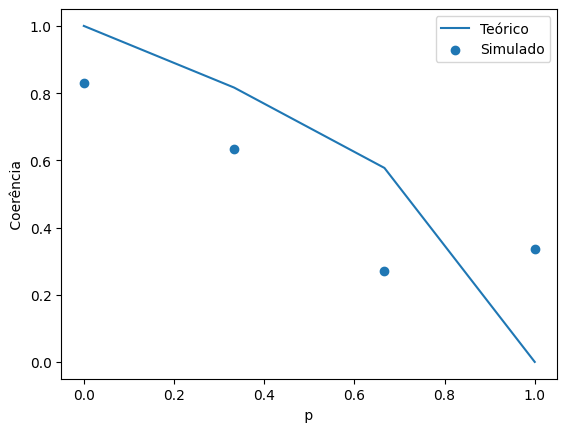

In [6]:
# teste
list_p = np.linspace(0,1,4)
run_calcs(list_p, 2)

0 de 21
[[ 4.90802324e-01+0.j          4.96927473e-01-0.00627771j
  -2.21748332e-03-0.01630249j -1.22536031e-02+0.0206064j ]
 [ 4.96927473e-01+0.00627771j  5.06062665e-01+0.j
  -1.11956235e-03-0.01570023j -1.17183149e-02+0.02196676j]
 [-2.21748332e-03+0.01630249j -1.11956235e-03+0.01570023j
   1.09009563e-03+0.j          4.51106455e-05-0.00037339j]
 [-1.22536031e-02-0.0206064j  -1.17183149e-02-0.02196676j
   4.51106455e-05+0.00037339j  2.04491524e-03+0.j        ]]
1 de 21
[[ 0.45386712+0.j          0.48167436-0.02160193j -0.03323459+0.0272115j
   0.11379616+0.01061741j]
 [ 0.48167436+0.02160193j  0.51300796+0.j         -0.036478  +0.0273347j
   0.12055629+0.01632762j]
 [-0.03323459-0.0272115j  -0.036478  -0.0273347j   0.00407661+0.j
  -0.00768069-0.00765351j]
 [ 0.11379616-0.01061741j  0.12055629-0.01632762j -0.00768069+0.00765351j
   0.02904832+0.j        ]]
2 de 21
[[ 5.16086358e-01+0.j          4.71707949e-01-0.00401523j
  -3.00338850e-04+0.0216981j   1.48535272e-01-0.04229732j]
 [ 

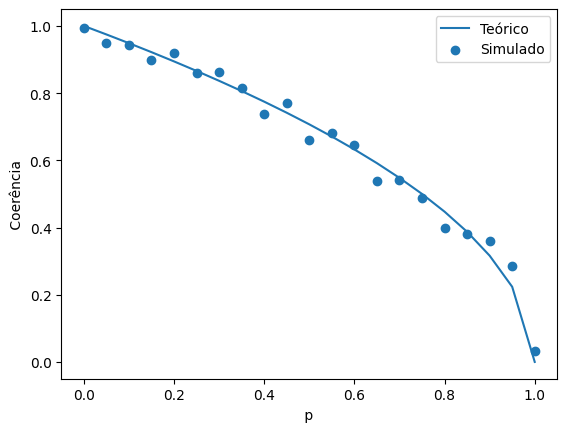

In [7]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 85)